In [40]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

from pyrl.agents.classic import QLearning as ClassicQLearning
from pyrl.agents.survival import QLearning as SurvivalQLearning
from pyrl.agents.survival import KLearning
from pyrl import Sim

In [41]:
map_size = (50, 5)
horizon = 10000
repeat = 20
points = 10

"""map_size = 500
horizon = 5000
repeat = 50
survival_threshold = 200
points = 10
"""

"""
map_size = 120
horizon = 3000
repeat = 100
survival_threshold = 200
points = 10
"""
"""
map_size = 80
horizon = 2000
repeat = 100
survival_threshold = 100
points = 10
"""
"""
map_size = 80
horizon = 1000
repeat = 100
survival_threshold = 100
points = 10
"""

#env = gym.make("pyrl.environments:Survival-v0", size=map_size, render_mode="human")
env = gym.make("pyrl.environments:Survival-v0", size=map_size)

def episode_callback(env, agent):
    pass

def should_explore(agent):
    return np.random.rand() < 0.5

gamma = 0.9
initial_Q_value = 0
initial_K_value = 550
survival_threshold = 200
exploration_threshold = 400

budgets = np.linspace(500, 4000, points, dtype=int)

## Classic QLearning

In [42]:
qclassic_time_mean = np.full(budgets.shape, -1)
qclassic_exploration_rate = np.full(budgets.shape, -1)
qclassic_alive_rate = np.full(budgets.shape, -1)
qclassic_budget_evolutions_mean = np.full(budgets.shape, None)
qclassic_budget_evolutions_max = np.full(budgets.shape, None)
qclassic_budget_evolutions_min = np.full(budgets.shape, None)
qclassic_exploration_map = np.full(budgets.shape, None)

for i, b in enumerate(budgets):
    nb_alive = 0
    for j in range(repeat):
        print(f"====> Classic QLearning {b} | Try {j + 1}")
        agent = ClassicQLearning(env.observation_space, env.action_space, budget=b, should_explore=should_explore, discount=gamma, initial_Q_value=initial_Q_value)
        sim = Sim(agent, env, episode_horizon=horizon, episode_finished_callback=episode_callback)
        sim.run()

        if qclassic_time_mean[i] == -1:
            qclassic_time_mean[i] = sim.metrics["time"]
        else:
            qclassic_time_mean[i] = qclassic_time_mean[i] + (1/j) * (sim.metrics["time"] - qclassic_time_mean[i])
        
        exploration_rate = (np.count_nonzero(sim.metrics["exploration"]) / (env.observation_space.n * env.action_space.n)) * 100

        if qclassic_exploration_rate[i] == -1:
            qclassic_exploration_rate[i] = exploration_rate
        else:
            qclassic_exploration_rate[i] = qclassic_exploration_rate[i] + (1 / j) * (exploration_rate - qclassic_exploration_rate[i])

        if agent.budget > 0:
            nb_alive = nb_alive + 1

        qclassic_alive_rate[i] = nb_alive / (j+1) * 100

        # budget evolution mean
        if qclassic_budget_evolutions_mean[i] is None:
            qclassic_budget_evolutions_mean[i] = sim.metrics["budget"]
        else:
            qclassic_budget_evolutions_mean[i] = qclassic_budget_evolutions_mean[i] + (1 / j) * (sim.metrics["budget"] - qclassic_budget_evolutions_mean[i])

        # budget evolution max
        if qclassic_budget_evolutions_max[i] is None:
            qclassic_budget_evolutions_max[i] = sim.metrics["budget"]
        else:
            qclassic_budget_evolutions_max[i] = np.maximum(qclassic_budget_evolutions_max[i], sim.metrics["budget"])

        # budget evolution min
        if qclassic_budget_evolutions_min[i] is None:
            qclassic_budget_evolutions_min[i] = sim.metrics["budget"]
        else:
            qclassic_budget_evolutions_min[i] = np.minimum(qclassic_budget_evolutions_min[i], sim.metrics["budget"])
        
        # exploration map
        if qclassic_exploration_map[i] is None:
            qclassic_exploration_map[i] = sim.metrics["exploration"]
        else:
            qclassic_exploration_map[i] = qclassic_exploration_map[i] + (1 / j) * (sim.metrics["exploration"] - qclassic_exploration_map[i])

        print(f"Time mean : {qclassic_time_mean[i]}")
        print(f"Alive rate : {qclassic_alive_rate[i]}%")

====> Classic QLearning 1000 | Try 1
Time mean : 1583
Alive rate : 0%
====> Classic QLearning 1000 | Try 2
Time mean : 1561
Alive rate : 0%
====> Classic QLearning 1000 | Try 3
Time mean : 1500
Alive rate : 0%
====> Classic QLearning 1000 | Try 4
Time mean : 4333
Alive rate : 25%
====> Classic QLearning 1000 | Try 5
Time mean : 3541
Alive rate : 20%
====> Classic QLearning 1000 | Try 6
Time mean : 4832
Alive rate : 33%
====> Classic QLearning 1000 | Try 7
Time mean : 5693
Alive rate : 42%
====> Classic QLearning 1000 | Try 8
Time mean : 6308
Alive rate : 50%
====> Classic QLearning 1000 | Try 9


KeyboardInterrupt: 

## Survival QLearning

In [ ]:
qsurvival_time_mean = np.full(budgets.shape, -1)
qsurvival_exploration_rate = np.full(budgets.shape, -1)
qsurvival_alive_rate = np.full(budgets.shape, -1)
qsurvival_budget_evolutions_mean = np.full(budgets.shape, None)
qsurvival_budget_evolutions_max = np.full(budgets.shape, None)
qsurvival_budget_evolutions_min = np.full(budgets.shape, None)
qsurvival_exploration_map = np.full(budgets.shape, None)

for i, b in enumerate(budgets):
    nb_alive = 0
    for j in range(repeat):
        print(f"====> Survival QLearning {b} | Try {j + 1}")
        #agent = SurvivalQLearning(env.observation_space, env.action_space, survival_threshold=survival_threshold, budget=b, should_explore=should_explore, discount=gamma)
        agent = KLearning(
            env.observation_space,
            env.action_space,
            budget=b,
            should_explore=should_explore,
            discount=gamma,
            initial_Q_value=initial_Q_value,
            initial_K_value=initial_K_value,
            survival_threshold=survival_threshold,
            exploration_threshold=exploration_threshold,
        )
        sim = Sim(agent, env, episode_horizon=horizon, episode_finished_callback=episode_callback)
        sim.run()

        if qsurvival_time_mean[i] == -1:
            qsurvival_time_mean[i] = sim.metrics["time"]
        else:
            qsurvival_time_mean[i] = qsurvival_time_mean[i] + (1/j) * (sim.metrics["time"] - qsurvival_time_mean[i])

        exploration_rate = (np.count_nonzero(sim.metrics["exploration"]) / (env.observation_space.n * env.action_space.n)) * 100

        if qsurvival_exploration_rate[i] == -1:
            qsurvival_exploration_rate[i] = exploration_rate
        else:
            qsurvival_exploration_rate[i] = qsurvival_exploration_rate[i] + (1 / j) * (exploration_rate - qsurvival_exploration_rate[i])

        if agent.budget > 0:
            nb_alive = nb_alive + 1

        qsurvival_alive_rate[i] = nb_alive / (j+1) * 100

        # budget evolution mean
        if qsurvival_budget_evolutions_mean[i] is None:
            qsurvival_budget_evolutions_mean[i] = sim.metrics["budget"]
        else:
            qsurvival_budget_evolutions_mean[i] = qsurvival_budget_evolutions_mean[i] + (1 / j) * (sim.metrics["budget"] - qsurvival_budget_evolutions_mean[i])

        # budget evolution max
        if qsurvival_budget_evolutions_max[i] is None:
            qsurvival_budget_evolutions_max[i] = sim.metrics["budget"]
        else:
            qsurvival_budget_evolutions_max[i] = np.maximum(qsurvival_budget_evolutions_max[i], sim.metrics["budget"])

        # budget evolution min
        if qsurvival_budget_evolutions_min[i] is None:
            qsurvival_budget_evolutions_min[i] = sim.metrics["budget"]
        else:
            qsurvival_budget_evolutions_min[i] = np.minimum(qsurvival_budget_evolutions_min[i], sim.metrics["budget"])
        
        # exploration map
        if qsurvival_exploration_map[i] is None:
            qsurvival_exploration_map[i] = sim.metrics["exploration"]
        else:
            qsurvival_exploration_map[i] = qsurvival_exploration_map[i] + (1 / j) * (sim.metrics["exploration"] - qsurvival_exploration_map[i])

        print(f"Time mean : {qsurvival_time_mean[i]}")
        print(f"Alive rate : {qsurvival_alive_rate[i]}%")

====> Survival QLearning 1000 | Try 1
Time mean : 10000
Alive rate : 100%
====> Survival QLearning 1000 | Try 2
Time mean : 1363
Alive rate : 50%
====> Survival QLearning 1000 | Try 3
Time mean : 1220
Alive rate : 33%
====> Survival QLearning 1000 | Try 4
Time mean : 4146
Alive rate : 50%
====> Survival QLearning 1000 | Try 5
Time mean : 3642
Alive rate : 40%
====> Survival QLearning 1000 | Try 6
Time mean : 3190
Alive rate : 33%
====> Survival QLearning 1000 | Try 7
Time mean : 2843
Alive rate : 28%
====> Survival QLearning 1000 | Try 8
Time mean : 3865
Alive rate : 37%
====> Survival QLearning 1000 | Try 9
Time mean : 4631
Alive rate : 44%
====> Survival QLearning 1000 | Try 10
Time mean : 5227
Alive rate : 50%
====> Survival QLearning 1000 | Try 11
Time mean : 5704
Alive rate : 54%
====> Survival QLearning 1000 | Try 12
Time mean : 6094
Alive rate : 58%
====> Survival QLearning 1000 | Try 13
Time mean : 6419
Alive rate : 61%
====> Survival QLearning 1000 | Try 14
Time mean : 6134
Al

## Results

### Survival time

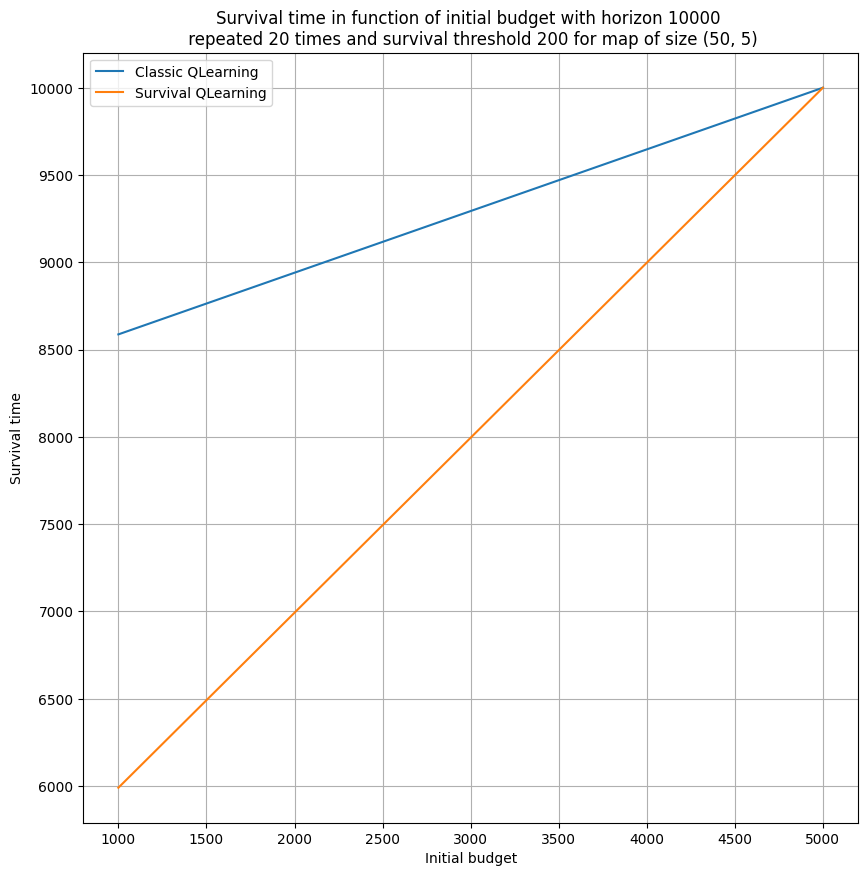

In [ ]:
plt.plot(budgets, qclassic_time_mean, label="Classic QLearning")
plt.plot(budgets, qsurvival_time_mean, label="Survival QLearning")
plt.xlabel("Initial budget")
plt.ylabel("Survival time")
plt.legend()
plt.grid()
plt.title(f"Survival time in function of initial budget with horizon {horizon} \n repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

### Alive rate

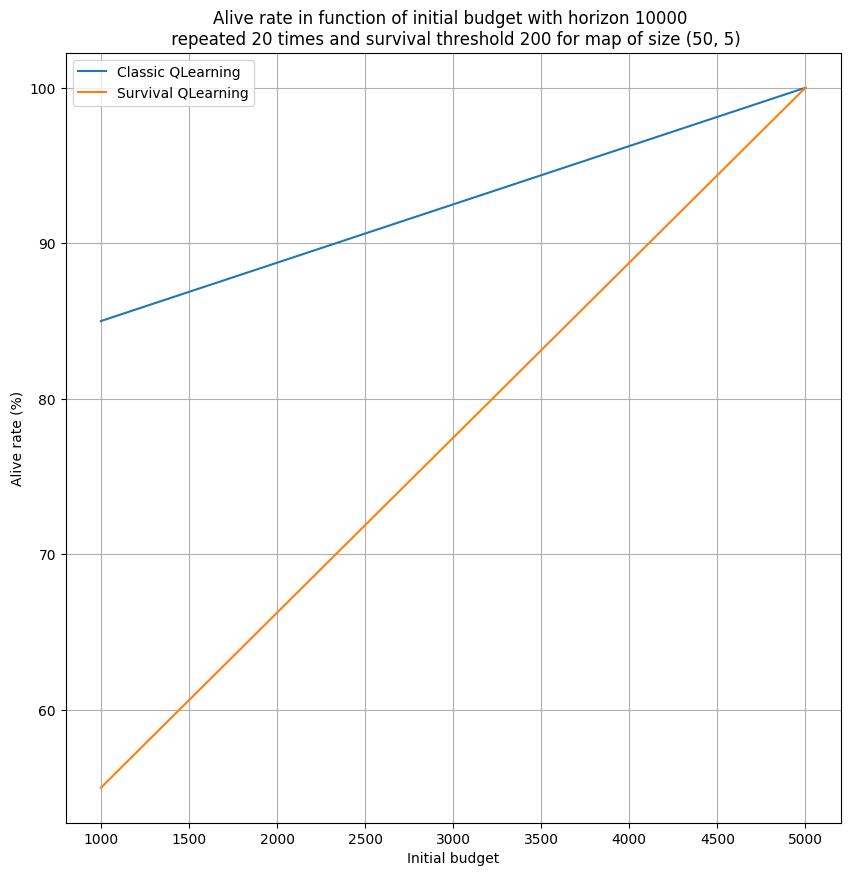

In [ ]:
plt.plot(budgets, qclassic_alive_rate, label="Classic QLearning")
plt.plot(budgets, qsurvival_alive_rate, label="Survival QLearning")
plt.xlabel("Initial budget")
plt.ylabel("Alive rate (%)")
plt.legend()
plt.grid()
plt.title(f"Alive rate in function of initial budget with horizon {horizon} \n repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

### Exploration rate

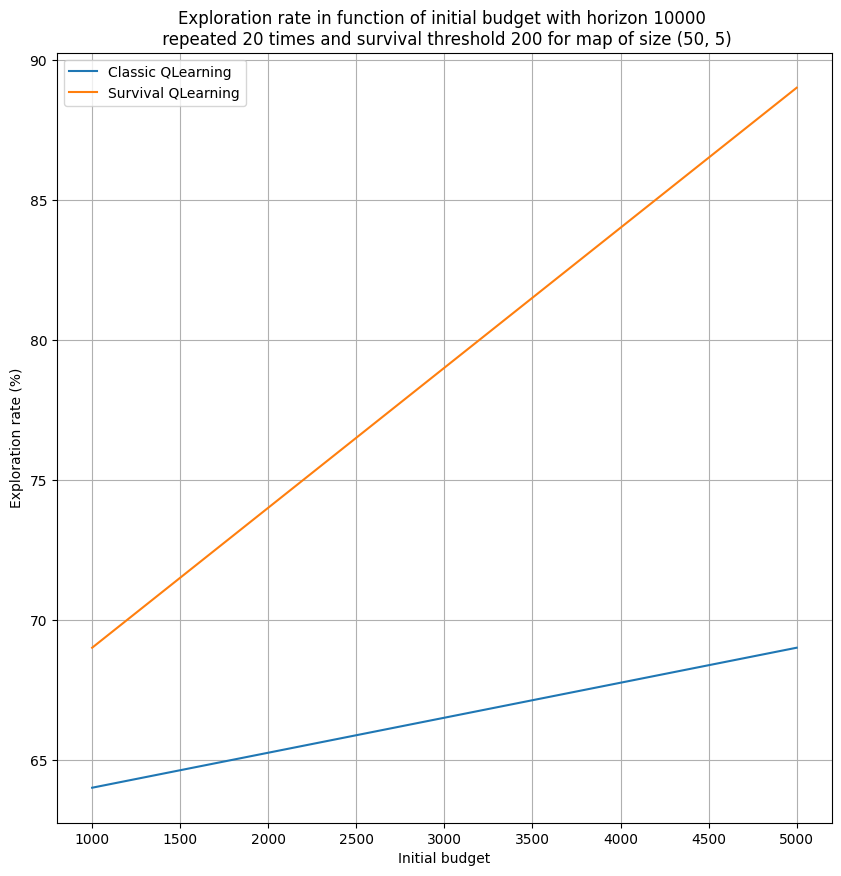

In [ ]:
#plt.plot(budgets, cde_exploration_rate, label="CDELearning")
plt.plot(budgets, qclassic_exploration_rate, label="Classic QLearning")
plt.plot(budgets, qsurvival_exploration_rate, label="Survival QLearning")
plt.xlabel("Initial budget")
plt.ylabel("Exploration rate (%)")
plt.legend()
plt.grid()
plt.title(f"Exploration rate in function of initial budget with horizon {horizon} \n repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

### Budget evolution

In [ ]:
print("Available budgets :")
print(budgets)

Available budgets :
[1000 5000]


In [ ]:
plt.rcParams["figure.figsize"] = (10,10)

with_bounds = False

show_only = []

#### QLearning

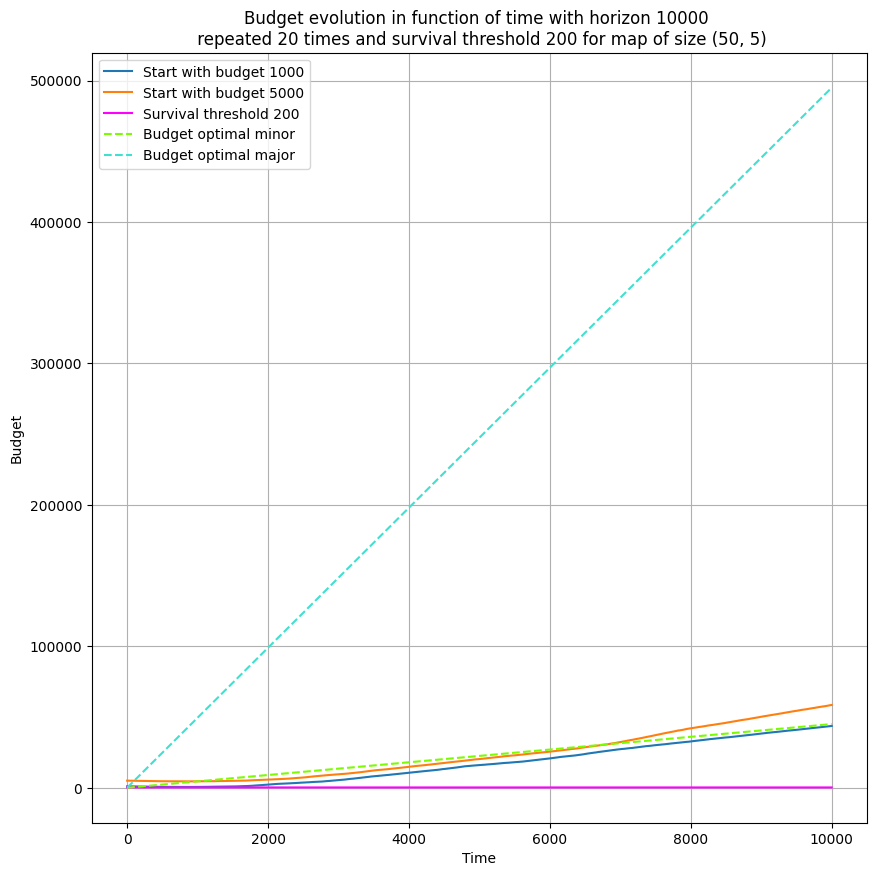

In [ ]:
t = np.arange(horizon)

for i, evo in enumerate(qclassic_budget_evolutions_mean):
    if len(show_only) > 0 and budgets[i] not in show_only:
        continue
    
    lines = plt.plot(t, evo, label=f"Start with budget {budgets[i]}")

    if with_bounds:
        plt.fill_between(t, qsurvival_budget_evolutions_min[i], qsurvival_budget_evolutions_max[i], color=lines[0].get_color(), alpha=0.15)

plt.plot(t, np.full((horizon,), survival_threshold), color="magenta", label=f"Survival threshold {survival_threshold}")
plt.plot(t, 4.5 * t, color="lawngreen", ls="--", label=f"Budget optimal minor")
plt.plot(t, 49.5 * t, color="turquoise", ls="--", label=f"Budget optimal major")
plt.xlabel("Time")
plt.ylabel("Budget")
plt.legend()
plt.grid()
plt.title(f"Budget evolution in function of time with horizon {horizon} \n repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

#### Survival QLearning

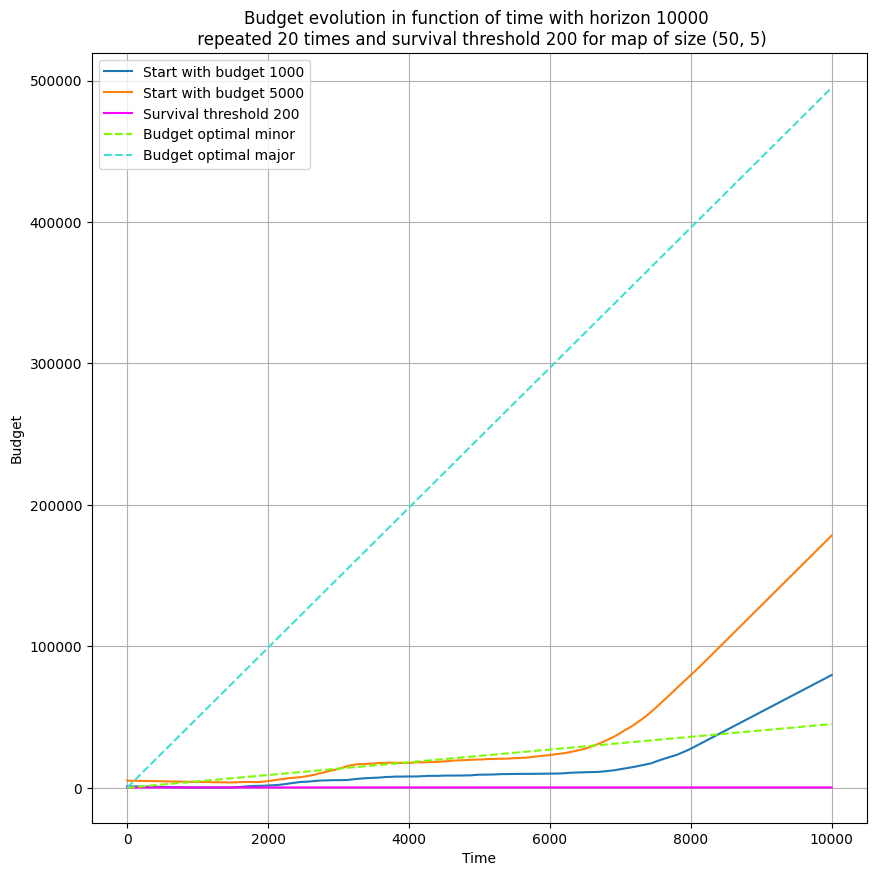

In [ ]:
import matplotlib.colors as mcolors

t = np.arange(horizon)

for i, evo in enumerate(qsurvival_budget_evolutions_mean):
    if len(show_only) > 0 and budgets[i] not in show_only:
        continue
    
    lines = plt.plot(t, evo, label=f"Start with budget {budgets[i]}")

    if with_bounds:
        plt.fill_between(t, qsurvival_budget_evolutions_min[i], qsurvival_budget_evolutions_max[i], color=lines[0].get_color(), alpha=0.15)

plt.plot(t, np.full((horizon,), survival_threshold), color="magenta", label=f"Survival threshold {survival_threshold}")
plt.plot(t, 4.5 * t, color="lawngreen", ls="--", label=f"Budget optimal minor")
plt.plot(t, 49.5 * t, color="turquoise", ls="--", label=f"Budget optimal major")
plt.xlabel("Time")
plt.ylabel("Budget")
plt.legend()
plt.grid()
plt.title(f"Budget evolution in function of time with horizon {horizon} \n repeated {repeat} times and survival threshold {survival_threshold} for map of size {map_size}")
plt.show()

## Success

### Classic QLearning

In [ ]:
target_states = env.get_target_states()

target_means = dict()
for label, state in target_states.items():

    values = list()

    for j, b in enumerate(budgets):
        values.append(np.sum(qclassic_exploration_map[j][state, :]))

    target_means[label] = values

x = np.arange(len(budgets))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in target_means.items():
    offset = (width) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of passages')
ax.set_title(f"Average number of passages through a positive reward \n as a function of budget for {repeat} repeat")
ax.set_xticks(x + 0.5 * width, budgets)
ax.legend(loc='upper left', ncols=3)
plt.show()

IndexError: index 2402 is out of bounds for axis 0 with size 250

### Survival QLearning

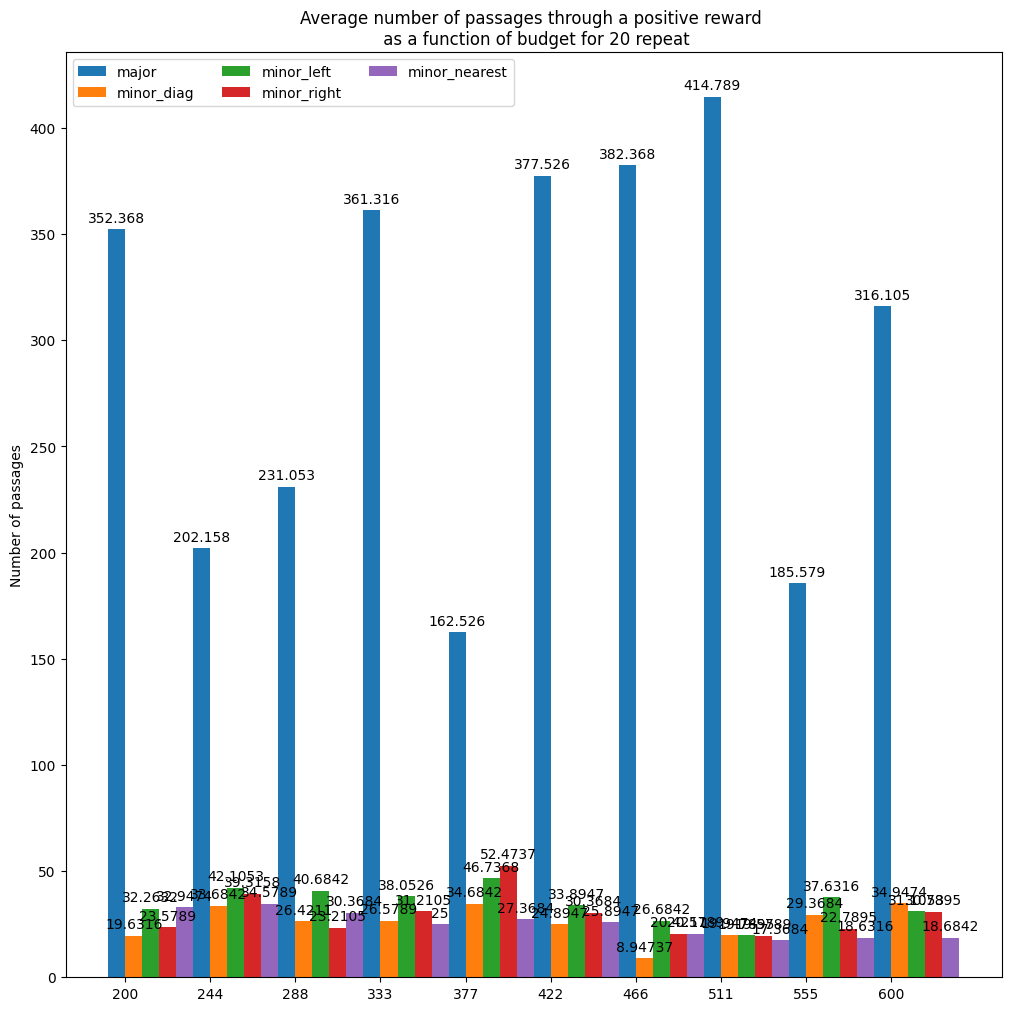

In [ ]:
target_states = env.get_target_states()

target_means = dict()
for label, state in target_states.items():

    values = list()

    for j, b in enumerate(budgets):
        values.append(np.sum(qsurvival_exploration_map[j][state, :]))

    target_means[label] = values

x = np.arange(len(budgets))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in target_means.items():
    offset = (width) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of passages')
ax.set_title(f"Average number of passages through a positive reward \n as a function of budget for {repeat} repeat")
ax.set_xticks(x + 0.5 * width, budgets)
ax.legend(loc='upper left', ncols=3)
plt.show()

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)

## Visit

In [ ]:
env.close()